<h1 style="font-size:30px">Exploratory Analysis</h1>
<hr>

1. Basic information
2. Distributions of numeric features
3. Distributions of categorical features
4. Segmentations
5. Correlations

<span style="font-size:18px">**Import libraries**</span>

In [1]:
# Numpy for numerical computing
import numpy as np

# Pandas for Dataframes
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplolib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

<span style="font-size:18px">**Load training data**</span>

In [2]:
df_train = pd.read_csv('train.csv')

<span style="font-size:18px">**1. Basic information**</span>

In [3]:
# Dataframe dimensions
df_train.shape

(891, 12)

Let's take a look which features there are, and which ones are **numeric** and **categorical**:

In [4]:
# Features datatypes
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* "Sex" feature can be replaced by binary variable
* "Age" can be a integer
* Since there is "PassengerID", maybe the "Name" is not relevant

In [5]:
# First 5 rows of data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Last 5 rows of data
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style="font-size:18px">**2. Distributions of numeric features**</span>

Let's look the numeric features distributions.

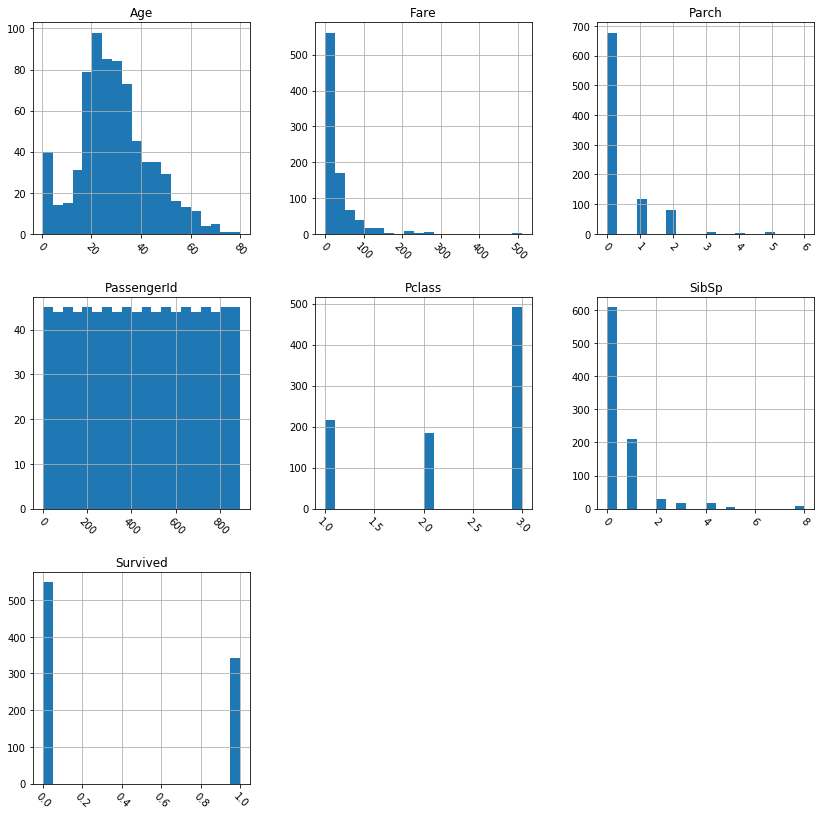

In [8]:
# Plot histogram grid
df_train.hist(figsize = (14,14), xrot = -45, bins=20)
plt.show()

At first, "Age" seems a little weird to have 0 values, but looking at the summary statistics we can see that its minimum value is not zero.

In [9]:
# Summary statistics for numerical features
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style="font-size:18px">**3. Distributions of categorical features**</span>

Let's look the summary of the categorical features.

In [10]:
# Summarize categorical features
df_train.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Peter, Mrs. Catherine (Catherine Rizk)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


* From "Name" feature we can see that apparently there is no duplicates
* There are missing values for "Cabin" and "Embarked". Maybe the "Cabin" feature might not be very helpful for the analysis, since there are more missing values than actual values

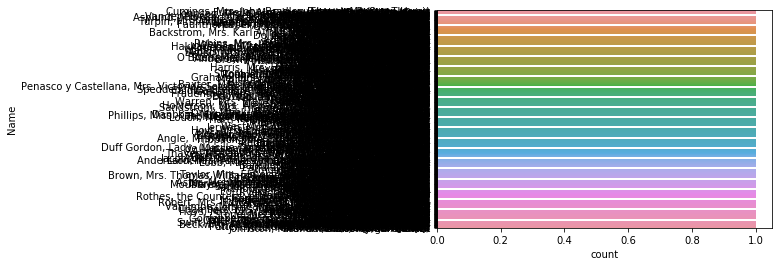

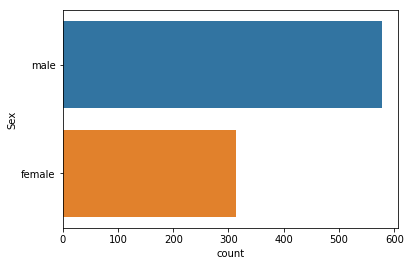

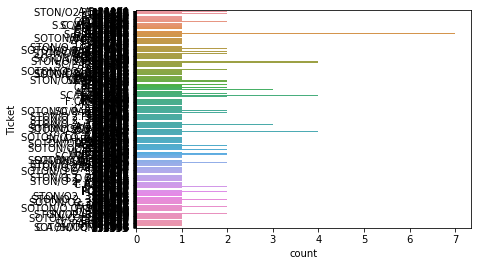

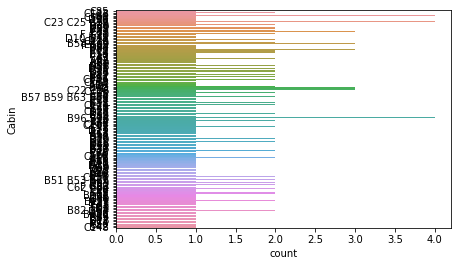

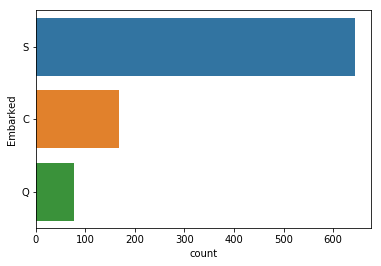

In [11]:
# Plot bar plot for each categorical feature
for name in df_train.dtypes[df_train.dtypes == 'object'].index:
    sns.countplot(y = name, data = df_train)
    plt.show()

<span style="font-size:18px">**4. Segmentations**</span><br>
<br>
Segmentation is powerful to observe the relationship between **categorical features** and **numeric features**

In [12]:
# Segment by categorical_feature and display the means within each class
df_train.groupby('Sex').agg([np.mean,np.std])

PassengerId              Survived              Pclass           \
              mean         std      mean       std      mean      std   
Sex                                                                     
female  431.028662  256.846324  0.742038  0.438211  2.159236  0.85729   
male    454.147314  257.486139  0.188908  0.391775  2.389948  0.81358   

              Age                SibSp               Parch            \
             mean        std      mean       std      mean       std   
Sex                                                                    
female  27.915709  14.110146  0.694268  1.156520  0.649682  1.022846   
male    30.726645  14.678201  0.429809  1.061811  0.235702  0.612294   

             Fare             
             mean        std  
Sex                           
female  44.479818  57.997698  
male    25.523893  43.138263

<span style="font-size:18px">**5. Correlations**</span><br>
<br>
Relationships between **numeric features**
* near -1/+1 indicate a **strong relationship**
* near 0 indicate a **weak relationship**
* 0 indicate **no relationship**

In [13]:
# Calculate correlations between numeric features
correlations = df_train.corr()

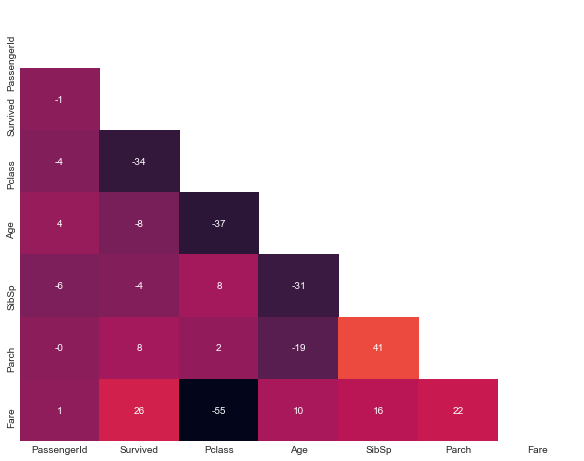

In [14]:
# Change color scheme
sns.set_style(style = "white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Make the figsize 10 x 8
plt.figure(figsize = (10,8))

# Plot heatmap of annotated correlations
sns.heatmap(correlations*100, 
            annot = True, 
            fmt = '.0f', 
            mask = mask,
            cbar = False)
plt.show()

<h1 style="font-size:30px">Data Cleaning</h1>
<hr>

1. Drop unwanted observations
2. Fix structural erros
3. Flag and fill missing numerical data

<span style="font-size:18px">**1. Drop unwanted observations**</span><br>
* Duplicate observations<br>
* Irrelevant observations: observations that don't actually fit the **specific problem**

In [15]:
# Drop duplicates
df_train.drop_duplicates().shape

(891, 12)

* "PassengerId" and "Name" features have the same goal as the index, i.e., they identify each passenger
* "Cabin" feature has more than 3/4 of missing values

In [16]:
# Drop irrelevant observations
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<span style="font-size:18px">**2. Fix structural errors**</span>

In [17]:
# Display unique values of the feature
df_train = pd.get_dummies(df_train, prefix=['Sex','Embarked'], drop_first=True)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
df_train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

<span style="font-size:18px">**3. Flag and fill missing numeric data**</span><br>
* Best used for **cross-sectional** data. The cross-sectional data is data collected for many subjects at the same point in time
* For time series, consider **interpolation**. The time series data is data collected for one subject throughout many points in time

In [19]:
# Create new feature is missing values for "Age"
age_median = np.nanmedian(df_train.Age, axis=0)
df_train.Age.replace(np.nan, age_median, inplace=True)
df_train.Age.isnull().sum()

0

<h1 style="font-size:30px">Model Training</h1>
<hr>

1. Split the dataset
2. Build model pipelines
3. Declare hyperparameters o tune
4. Fit and tune models with cross-validation
5. Evaluate metrics and select winner
6. Saving the winning model

<span style="font-size:18px">**Import libraries**</span>

In [20]:
# Scikit-Learn for modeling
import sklearn

# Pickle for saving model files
import pickle

In [21]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# Function for standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

**Classification Algorithms**

In [22]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Classification metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix

<span style="font-size:18px">**Analytical base table**</span>

In [23]:
# First 5 rows
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<span style="font-size:18px">**1. Split the dataset**</span><br>

Separate the dataframe into separate objects for the target variable (y) and the input features (X)

In [24]:
# Create separate object for target variable
y_train = df_train.Survived

# Create separate object for input features
X_train = df_train.drop('Survived', axis = 1)

<span style="font-size:18px">**2. Build model pipelines**</span><br>
The pipeline will standardize the data first, then apply the model algorithm to it

**Preprocessing**: should be performed inside the cross-validation loop
* Transform or scale the features
* Perform automatic feature reduction (e.g. PCA)
* Remove correlated features<br>
<br>
**Standartization**: transforms all features to the same **scale** by substracting means and dividing by standard deviations.
* Feature's distribution **centered around zero, with unit variance**

* The **random_state = 123** is set for replicable results

**Classification pipelines**

In [25]:
# Create pipelines dictionary
pipelines = {'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty = 'l1', random_state = 123)),
             'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty = 'l2', random_state = 123)),
             'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 123)),
             'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state = 123))}

<span style="font-size:18px">**3. Declare hyperparameters to tune**</span><br>
**Hyperparameters** express "higher-level" structural settings for modeling algorithms<br>
* e.g. strength of the penalty used in regularized regression
* e.g. the number of trees to include in a random forest
* They are **decided** before training the model because they cannot be learned from the data

**Classification hyperparameters**

* **C** is the **strength of the penalty**, inverse of alpha from regularization strength
* Higher values of C mean weacker penalties
* C is a positive value, typically between 0 and 1000
* The default is 1.0

In [26]:
# Logistic Regression hyperparameters
l1_hyperparameters = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
l2_hyperparameters = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}

In [27]:
# Random Forest hyperparameters
rf_hyperparameters = {'randomforestclassifier__n_estimators': [100, 200],
                      'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]}

In [28]:
# Boosted tree hyperparameters
gb_hyperparameters = {'gradientboostingclassifier__n_estimators': [100, 200],
                      'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
                      'gradientboostingclassifier__max_depth': [1, 3, 5]}

In [29]:
# Create hyperparameters
hyperparameters = {'l1': l1_hyperparameters,
                   'l2': l2_hyperparameters,
                   'rf': rf_hyperparameters,
                   'gb': gb_hyperparameters}

<span style="font-size:18px">**4. Fit and tune models with cross-validation**</span><br>

The GridSearchCV function performs cross-validation on the **hyperparameter grid**, through each **combination of values**. It then calculates **cross-validated scores** (using performance metrics) for each combination of hyperparameter values and picks the combination that has the best score
* **cv** is the number of cross-validation folds
* **n_jobs = -1** trains in parallel across the maximum number of cores of the computer, speeding it up

In [30]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name]
    fitted_models[name] = model
    
    # Print when the model is fitted
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


<span style="font-size:18px">**5. Evaluate models and select winner**</span><br>

In [31]:
# Display best_score_ for each fitted_model
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.7934904601571269
l2 0.7934904601571269
rf 0.8159371492704826
gb 0.835016835016835


**Classification metrics**

First evaluate the models by looking at their **cross-validated performance** on the training set, through the **holdout accuracy** scores
* Accuracy is simply the percent of observations correctly classified by the model
* Because is the average accuracy from the **holdout folds**, higher is almost always better

Straight accuracy is not always the best way to evaluate a classification model, specifically when evaluating **imbalanced classes** in the target variable<br>
<br>
**Area under ROC curve** is the most reliable metric for classification tasks. It is equivalent to the probability that a randomly chosen **positive** observation ranks higher (has a higher predicted probability) than a randomly chosen **negative** observation
* ROC curve is a way to visualize the **relationship between TPR (true positive rate) and FPR (false positive rate)** for classification models
* Plot the TPR and FPR at different **thresholds**

In [32]:
# Loop through the fitted_models to predict probabilities
for name, model in fitted_models.items():
    pred = model.predict_proba(X_train)
    
    # Get just the prediction for the positive class (1)
    pred = [p[1] for p in pred]
    
    # Calculate ROC curve from y_train and pred
    fpr, tpr, thresholds = roc_curve(y_train, pred)
    
    # Calculate and print AUROC
    print(name, auc(fpr, tpr))

l1 0.8571219335527648
l2 0.8571219335527648
rf 0.9973023785937217
gb 0.9722382002364747


<h1 style="font-size:30px">Data Cleaning</h1>
<hr>

<span style="font-size:18px">**Load test data**</span>

In [33]:
df_test = pd.read_csv('test.csv')
df_test.shape

(418, 11)

<span style="font-size:18px">**1. Drop unwanted observations**</span><br>

In [34]:
# Drop irrelevant observations
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


<span style="font-size:18px">**2. Fix structural errors**</span>

In [35]:
# Display unique values of the feature
df_test = pd.get_dummies(df_test, prefix=['Sex','Embarked'], drop_first=True)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


<span style="font-size:18px">**3. Flag and fill missing numeric data**</span><br>


In [36]:
# Create new feature is missing values for "Age"
age_median = np.nanmedian(df_train.Age, axis=0)
df_test.Age.replace(np.nan, age_median, inplace=True)
df_test.fillna(0, inplace=True)

In [37]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [38]:
# Create separate object for input features
X_test = df_test.drop('PassengerId', axis=1)

In [61]:
pred = fitted_models['gb'].predict_proba(X_test)
    
# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]
pred[:5]

[0.017892436301186553,
 0.10191640796779358,
 0.3600819843995879,
 0.21440895580363914,
 0.43929765425511547]

In [62]:
threshold = 0.5

result = pd.DataFrame()

result['PassengerId'] = df_test['PassengerId']
result['Survived'] = np.array([a >= threshold for a in pred]).astype(int)

result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [63]:
result.to_csv('titanic_prediction.csv', index=None)

<span style="font-size:18px">**6. Saving the winning model**</span><br>